# Binarization

In [1]:
library(loadeR)
library(transformeR)
library(visualizeR)

Warning message:
"package 'loadeR' was built under R version 3.6.3"Loading required package: rJava
Warning message:
"package 'rJava' was built under R version 3.6.3"

Loading required package: loadeR.java
Warning message:
"package 'loadeR.java' was built under R version 3.6.3"Java version 21x amd64 by Azul Systems, Inc. detected
NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready
Loading required package: climate4R.UDG
Warning message:
"package 'climate4R.UDG' was built under R version 3.6.3"climate4R.UDG version 0.2.6 (2023-06-26) is loaded
Please use 'citation("climate4R.UDG")' to cite this package.
loadeR version 1.8.1 (2023-06-22) is loaded
Please use 'citation("loadeR")' to cite this package.
Warning message:
"package 'transformeR' was built under R version 3.6.3"


    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.2.2 (2023-10-26) is loaded
Please see 'citation("transformeR")' to cite this package.
Warning message:
"package 'visualizeR' was built under R version 3.6.3"visualizeR version 1.6.4 (2023-10-26) is loaded
Please see 'citation("visualizeR")' to cite this package.


## Import Data

In [2]:
tmax <- readRDS("../tmax_year_season.rds")
pr <- readRDS("../pr_year_season.rds")

In [8]:
pr10 <- readRDS("../1_quantiles/pr10.rds")
tmax90 <- readRDS("../1_quantiles/tmax90.rds")
pr10_h <- readRDS("../1_quantiles/pr10_h.rds")

## Binarization Function

In [4]:
binarization <- function(grid_data, quantile, variable) {
# Iterate over the years in the data grid
  for (year in names(grid_data)) {
    # Iterate over the seasons of each year
    for (season in names(grid_data[[year]])) {
      # Get current station data
      season_data <- grid_data[[year]][[season]]
      season_quantile <- quantile[[season]]
      
      # Dimension of the data
      dims <- dim(season_data$Data)
      # Iterate over dimensions and convert to binary
      for (a in 1:dims[1]) {
        for (i in 1:dims[2]) {
          for (j in 1:dims[3]) {
            if (!is.na(season_data$Data[a, i, j]) && !is.na(season_quantile$Data[1, i, j])) {
              # If it is precipitation
              if(variable == "pr"){
                if (season_data$Data[a, i, j] < season_quantile$Data[1, i, j]) {
                  season_data$Data[a, i, j] <- 1
                } else {
                  season_data$Data[a, i, j] <- 0
                }
              # If it is tmax
              } else if (variable == "tmax"){
                if (season_data$Data[a, i, j] > season_quantile$Data[1, i, j]) {
                  season_data$Data[a, i, j] <- 1
                } else {
                  season_data$Data[a, i, j] <- 0
                }
              }
            }
          }
        }
      }
      
      # Actualizar el grid de datos con la estación binarizada
      grid_data[[year]][[season]] <- season_data
    }
  }
  
  # Devolver el grid de datos binarizado
  return(grid_data)
}

In [5]:
tmax_bin <- binarization(tmax, tmax90, "tmax")

In [6]:
pr_h_bin <- binarization(pr, pr10_h, "pr")

In [9]:
pr_bin <- binarization(pr, pr10, "pr")

## Binarization (Numbers)

In [3]:
binarization_number <- function(grid_data, pr, tmax, variable) {
# Iterate over the years in the data grid
  for (year in names(grid_data)) {
    # Iterate over the seasons of each year
    for (season in names(grid_data[[year]])) {
      # Get current station data
      season_data <- grid_data[[year]][[season]]
      
      # Dimension of the data
      dims <- dim(season_data$Data)
      # Iterate over dimensions and convert to binary
      for (a in 1:dims[1]) {
        for (i in 1:dims[2]) {
          for (j in 1:dims[3]) {
            if (!is.na(season_data$Data[a, i, j])) {
              # If it is precipitation
              if(variable == "pr"){
                if (season_data$Data[a, i, j] < pr) {
                  season_data$Data[a, i, j] <- 1
                } else {
                  season_data$Data[a, i, j] <- 0
                }
              # If it is tmax
              } else if (variable == "tmax"){
                if (season_data$Data[a, i, j] > tmax) {
                  season_data$Data[a, i, j] <- 1
                } else {
                  season_data$Data[a, i, j] <- 0
                }
              }
            }
          }
        }
      }
      
      # Actualizar el grid de datos con la estación binarizada
      grid_data[[year]][[season]] <- season_data
    }
  }
  
  # Devolver el grid de datos binarizado
  return(grid_data)
}

## Binarization(Reverse)

In [4]:
binarization_season_year <- function(grid_data, quantile, variable) {
# Iterate over the years in the data grid
  for (season in names(grid_data)) {
    # Iterate over the seasons of each year
    for (year in names(grid_data[[season]])) {
      # Get current station data
      season_data <- grid_data[[season]][[year]]
      season_quantile <- quantile[[season]]

      # Dimension of the data
      dims <- dim(season_data$Data)
    # Iterate over dimensions and convert to binary
      for (a in 1:dims[1]) {
        for (i in 1:dims[2]) {
          for (j in 1:dims[3]) {
            if (!is.na(season_data$Data[a, i, j]) && !is.na(season_quantile$Data[1, i, j])) {
              # If it is precipitation
              if(variable == "pr"){
                if (season_data$Data[a, i, j] < season_quantile$Data[1, i, j]) {
                  season_data$Data[a, i, j] <- 1
                } else {
                  season_data$Data[a, i, j] <- 0
                }
              # If it is tmax
              } else if (variable == "tmax"){
                if (season_data$Data[a, i, j] > season_quantile$Data[1, i, j]) {
                  season_data$Data[a, i, j] <- 1
                } else {
                  season_data$Data[a, i, j] <- 0
                }
              }
            }
          }
        }
      }
      
      # Actualizar el grid de datos con la estación binarizada
      grid_data[[season]][[year]] <- season_data
    }
  }
  
  # Devolver el grid de datos binarizado
  return(grid_data)
}

## Calculate

In [4]:
ls()

[1] "binarization_number" "pr"                  "tmax"

In [5]:
pr_bin <- binarization_number(pr, 0, 35, "pr")

In [14]:
tmax_bin <- binarization_number(tmax, 0, 35, "tmax")

In [6]:
saveRDS(object = pr_bin, file = "pr_bin_number.rds", compress ="xz")

In [15]:
saveRDS(object = tmax_bin, file = "tmax_bin_number.rds", compress ="xz")

In [7]:
# pr10_bin <- readRDS("pr10_bin.rds")
# pr10_h_bin <- readRDS("pr10_h_bin.rds")
# tmax90_bin <- readRDS("tmax90_bin.rds")
capa_tierra <- readRDS("../capa_tierra.rds")

In [8]:
# Create a function that iter over the years and seasons of one data grid and execute the function climatology to summarize the data
sum_events <- function(grid) {
  grid1 <- grid
  # Iterate over the years in the grid
  for (year in names(grid1)) {
    # Iterate over the seasons in each year
    for (season in names(grid[[year]])) {
      # Get the data of the current season
      season_data1 <- grid[[year]][[season]]
      # Apply the function to the data
      sum_events <- climatology(season_data1, clim.fun = list(FUN = "sum", na.rm = TRUE))
      # sum_events <- gridArithmetics(sum_events, capa_tierra, operator = "*")
      # Update the data grid with the result
      grid1[[year]][[season]] <- sum_events
    }
  }
  # Return the updated grid
  return(grid1)
}

In [9]:
# Función para realizar bindGrid de una estación específica para varios años
bindGridEstaciones <- function(datos, estacion) {
  # Extraemos los años disponibles en los datos
  years <- names(datos)
  # Creamos una lista para almacenar los grids de cada año
  lista_grids <- list()
  
  # Iteramos sobre los años
  for (year in years) {
    # Obtenemos el grid para la estación especificada
    grid <- datos[[year]][[estacion]]
    # Lo añadimos a la lista
    lista_grids[[year]] <- grid
  }
  
  # Realizamos el bindGrid con todos los grids de la lista
  # resultado <- do.call(bindGrid, c(lista_grids, list(dimension = "time", skip.temporal.check = TRUE)))
  resultado <- bindGrid(lista_grids, dimension = "time", skip.temporal.check = TRUE)
  return(resultado)
}

#### PR number

In [10]:
sumpr_num <- sum_events(pr_bin)

[2024-03-15 13:38:47] - Computing climatology...
[2024-03-15 13:38:47] - Done.
[2024-03-15 13:38:47] - Computing climatology...
[2024-03-15 13:38:47] - Done.
[2024-03-15 13:38:48] - Computing climatology...
[2024-03-15 13:38:48] - Done.
[2024-03-15 13:38:48] - Computing climatology...
[2024-03-15 13:38:48] - Done.
[2024-03-15 13:38:48] - Computing climatology...
[2024-03-15 13:38:48] - Done.
[2024-03-15 13:38:48] - Computing climatology...
[2024-03-15 13:38:48] - Done.
[2024-03-15 13:38:48] - Computing climatology...
[2024-03-15 13:38:48] - Done.
[2024-03-15 13:38:48] - Computing climatology...
[2024-03-15 13:38:48] - Done.
[2024-03-15 13:38:48] - Computing climatology...
[2024-03-15 13:38:48] - Done.
[2024-03-15 13:38:48] - Computing climatology...
[2024-03-15 13:38:48] - Done.
[2024-03-15 13:38:48] - Computing climatology...
[2024-03-15 13:38:48] - Done.
[2024-03-15 13:38:48] - Computing climatology...
[2024-03-15 13:38:48] - Done.
[2024-03-15 13:38:48] - Computing climatology...
[20

In [11]:
# Crear un vector con los nombres de las estaciones
estaciones <- c("Winter", "Spring", "Summer", "Autumn")

# Crear una lista para almacenar los resultados
datapr <- list()
datos_estacion <- list()
# Iterar sobre las estaciones
for (estacion in estaciones) {
  # Obtener los datos para la estación actual
  datos_estacion <- bindGridEstaciones(sumpr_num, estacion = estacion)
  datos_estacion <- climatology(datos_estacion, clim.fun = list(FUN = "sum", na.rm = TRUE))
  datos_estacion <- gridArithmetics(datos_estacion, capa_tierra, operator = "*")
  
  # Almacenar los resultados en la lista
  datapr[[estacion]] <- datos_estacion
}

[2024-03-15 13:39:05] - Computing climatology...
[2024-03-15 13:39:05] - Done.
[2024-03-15 13:39:05] - Computing climatology...
[2024-03-15 13:39:05] - Done.
[2024-03-15 13:39:05] - Computing climatology...
[2024-03-15 13:39:05] - Done.
[2024-03-15 13:39:05] - Computing climatology...
[2024-03-15 13:39:05] - Done.


In [12]:
pr <- bindGrid(datapr$Winter, datapr$Spring, datapr$Summer, datapr$Autumn, dimension = "member", skip.temporal.check = TRUE)

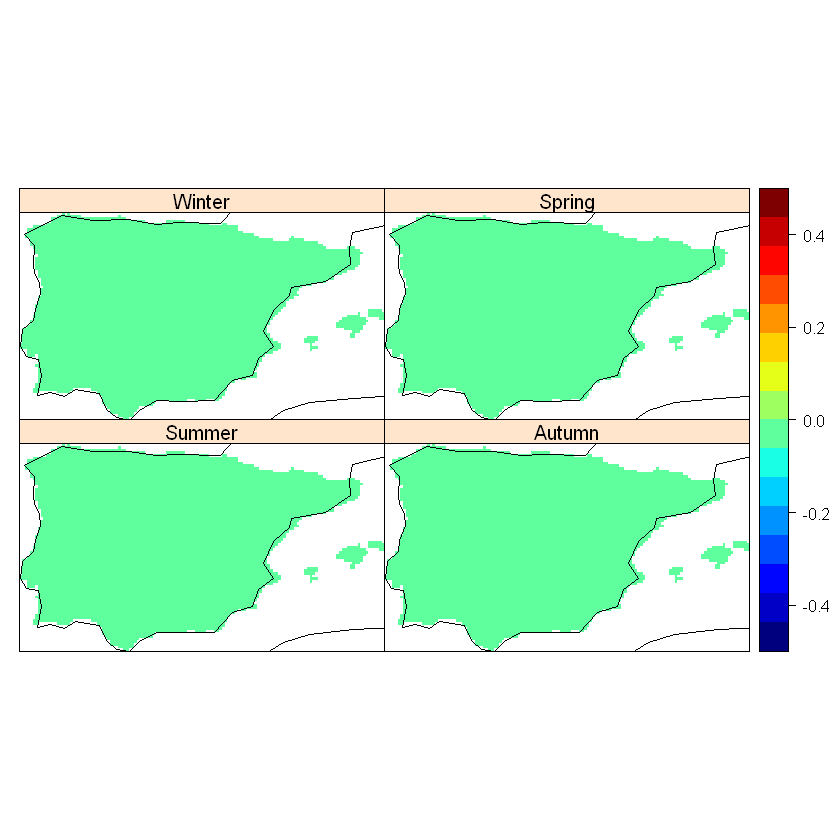

In [13]:
spatialPlot(pr, backdrop.theme = "coastline", color.theme = "jet.colors", names.attr = c("Winter", "Spring", "Summer", "Autumn"), as.table = TRUE)

#### Tmax number

In [16]:
sumtmax_num <- sum_events(tmax_bin)

[2024-03-15 13:46:55] - Computing climatology...
[2024-03-15 13:46:55] - Done.
[2024-03-15 13:46:55] - Computing climatology...
[2024-03-15 13:46:55] - Done.
[2024-03-15 13:46:55] - Computing climatology...
[2024-03-15 13:46:55] - Done.
[2024-03-15 13:46:55] - Computing climatology...
[2024-03-15 13:46:55] - Done.
[2024-03-15 13:46:55] - Computing climatology...
[2024-03-15 13:46:56] - Done.
[2024-03-15 13:46:56] - Computing climatology...
[2024-03-15 13:46:56] - Done.
[2024-03-15 13:46:56] - Computing climatology...
[2024-03-15 13:46:56] - Done.
[2024-03-15 13:46:56] - Computing climatology...
[2024-03-15 13:46:56] - Done.
[2024-03-15 13:46:56] - Computing climatology...
[2024-03-15 13:46:56] - Done.
[2024-03-15 13:46:56] - Computing climatology...
[2024-03-15 13:46:56] - Done.
[2024-03-15 13:46:57] - Computing climatology...
[2024-03-15 13:46:57] - Done.
[2024-03-15 13:46:57] - Computing climatology...
[2024-03-15 13:46:57] - Done.
[2024-03-15 13:46:57] - Computing climatology...
[20

In [17]:
# Crear un vector con los nombres de las estaciones
estaciones <- c("Winter", "Spring", "Summer", "Autumn")

# Crear una lista para almacenar los resultados
datapr <- list()
datos_estacion <- list()
# Iterar sobre las estaciones
for (estacion in estaciones) {
  # Obtener los datos para la estación actual
  datos_estacion <- bindGridEstaciones(sumtmax_num, estacion = estacion)
  datos_estacion <- climatology(datos_estacion, clim.fun = list(FUN = "sum", na.rm = TRUE))
  datos_estacion <- gridArithmetics(datos_estacion, capa_tierra, operator = "*")
  
  # Almacenar los resultados en la lista
  datapr[[estacion]] <- datos_estacion
}

[2024-03-15 13:47:10] - Computing climatology...
[2024-03-15 13:47:10] - Done.
[2024-03-15 13:47:10] - Computing climatology...
[2024-03-15 13:47:10] - Done.
[2024-03-15 13:47:10] - Computing climatology...
[2024-03-15 13:47:10] - Done.
[2024-03-15 13:47:10] - Computing climatology...
[2024-03-15 13:47:10] - Done.


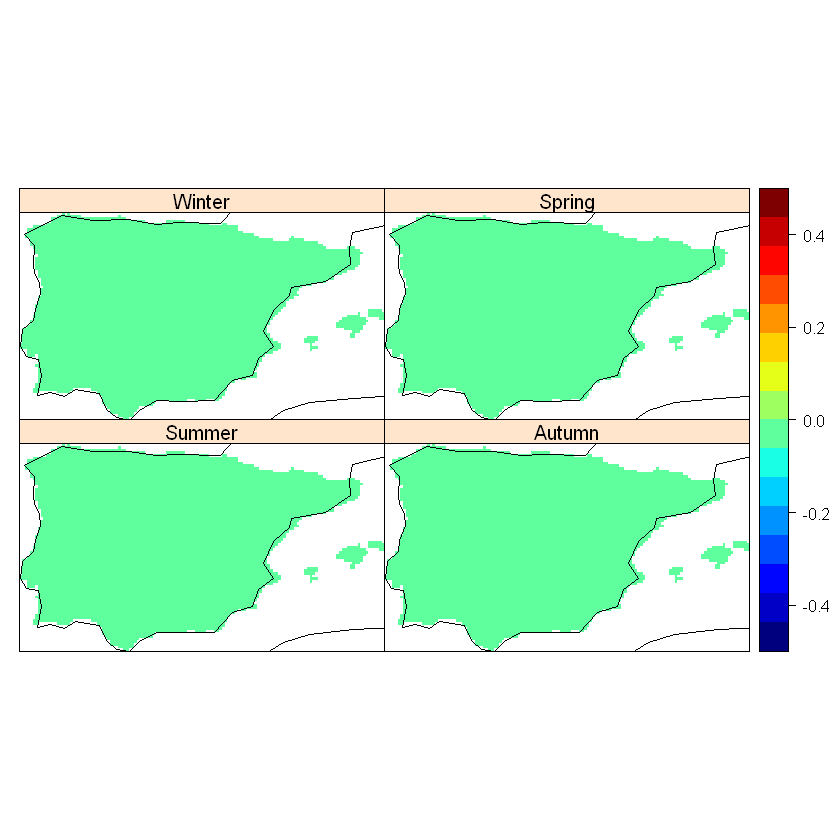

In [19]:
spatialPlot(pr, backdrop.theme = "coastline", color.theme = "jet.colors", names.attr = c("Winter", "Spring", "Summer", "Autumn"), as.table = TRUE)

#### Pr10

In [16]:
sumpr10 <- sum_events(pr_bin)

[2024-03-14 11:49:50] - Computing climatology...
[2024-03-14 11:49:50] - Done.
[2024-03-14 11:49:50] - Computing climatology...
[2024-03-14 11:49:50] - Done.
[2024-03-14 11:49:50] - Computing climatology...
[2024-03-14 11:49:51] - Done.
[2024-03-14 11:49:51] - Computing climatology...
[2024-03-14 11:49:51] - Done.
[2024-03-14 11:49:51] - Computing climatology...
[2024-03-14 11:49:51] - Done.
[2024-03-14 11:49:51] - Computing climatology...
[2024-03-14 11:49:51] - Done.
[2024-03-14 11:49:51] - Computing climatology...
[2024-03-14 11:49:51] - Done.
[2024-03-14 11:49:51] - Computing climatology...
[2024-03-14 11:49:51] - Done.
[2024-03-14 11:49:51] - Computing climatology...
[2024-03-14 11:49:51] - Done.
[2024-03-14 11:49:51] - Computing climatology...
[2024-03-14 11:49:51] - Done.
[2024-03-14 11:49:51] - Computing climatology...
[2024-03-14 11:49:51] - Done.
[2024-03-14 11:49:51] - Computing climatology...
[2024-03-14 11:49:51] - Done.
[2024-03-14 11:49:51] - Computing climatology...
[20

In [17]:
# Crear un vector con los nombres de las estaciones
estaciones <- c("Winter", "Spring", "Summer", "Autumn")

# Crear una lista para almacenar los resultados
datapr <- list()
datos_estacion <- list()
# Iterar sobre las estaciones
for (estacion in estaciones) {
  # Obtener los datos para la estación actual
  datos_estacion <- bindGridEstaciones(sumpr10, estacion = estacion)
  datos_estacion <- climatology(datos_estacion, clim.fun = list(FUN = "sum", na.rm = TRUE))
  datos_estacion <- gridArithmetics(datos_estacion, capa_tierra, operator = "*")
  
  # Almacenar los resultados en la lista
  datapr[[estacion]] <- datos_estacion
}

[2024-03-14 11:50:03] - Computing climatology...
[2024-03-14 11:50:03] - Done.
[2024-03-14 11:50:03] - Computing climatology...
[2024-03-14 11:50:03] - Done.
[2024-03-14 11:50:03] - Computing climatology...
[2024-03-14 11:50:03] - Done.
[2024-03-14 11:50:04] - Computing climatology...
[2024-03-14 11:50:04] - Done.


In [18]:
tmax <- bindGrid(datapr$Winter, datapr$Spring, datapr$Summer, datapr$Autumn, dimension = "member", skip.temporal.check = TRUE)

#### PR10_H

In [18]:
sumpr10_h <- sum_events(pr_h_bin)

[2024-03-14 11:50:04] - Computing climatology...
[2024-03-14 11:50:04] - Done.


[2024-03-14 11:50:04] - Computing climatology...
[2024-03-14 11:50:04] - Done.
[2024-03-14 11:50:04] - Computing climatology...
[2024-03-14 11:50:04] - Done.
[2024-03-14 11:50:04] - Computing climatology...
[2024-03-14 11:50:04] - Done.
[2024-03-14 11:50:04] - Computing climatology...
[2024-03-14 11:50:04] - Done.
[2024-03-14 11:50:04] - Computing climatology...
[2024-03-14 11:50:04] - Done.
[2024-03-14 11:50:04] - Computing climatology...
[2024-03-14 11:50:04] - Done.
[2024-03-14 11:50:04] - Computing climatology...
[2024-03-14 11:50:04] - Done.
[2024-03-14 11:50:04] - Computing climatology...
[2024-03-14 11:50:04] - Done.
[2024-03-14 11:50:04] - Computing climatology...
[2024-03-14 11:50:04] - Done.
[2024-03-14 11:50:05] - Computing climatology...
[2024-03-14 11:50:05] - Done.
[2024-03-14 11:50:05] - Computing climatology...
[2024-03-14 11:50:05] - Done.
[2024-03-14 11:50:05] - Computing climatology...
[2024-03-14 11:50:05] - Done.
[2024-03-14 11:50:05] - Computing climatology...
[20

In [19]:
# Crear un vector con los nombres de las estaciones
estaciones <- c("Winter", "Spring", "Summer", "Autumn")

# Crear una lista para almacenar los resultados
datapr_h <- list()
datos_estacion <- list()
# Iterar sobre las estaciones
for (estacion in estaciones) {
  # Obtener los datos para la estación actual
  datos_estacion <- bindGridEstaciones(sumpr10_h, estacion = estacion)
  datos_estacion <- climatology(datos_estacion, clim.fun = list(FUN = "sum", na.rm = TRUE))
  datos_estacion <- gridArithmetics(datos_estacion, capa_tierra, operator = "*")
  # Almacenar los resultados en la lista
  datapr_h[[estacion]] <- datos_estacion
}

[2024-03-14 11:50:18] - Computing climatology...
[2024-03-14 11:50:18] - Done.
[2024-03-14 11:50:18] - Computing climatology...
[2024-03-14 11:50:18] - Done.
[2024-03-14 11:50:19] - Computing climatology...
[2024-03-14 11:50:19] - Done.
[2024-03-14 11:50:19] - Computing climatology...
[2024-03-14 11:50:19] - Done.


#### Temp

In [20]:
sumtmax <- sum_events(tmax_bin)

[2024-03-14 11:50:19] - Computing climatology...
[2024-03-14 11:50:19] - Done.
[2024-03-14 11:50:19] - Computing climatology...


[2024-03-14 11:50:19] - Done.
[2024-03-14 11:50:19] - Computing climatology...
[2024-03-14 11:50:19] - Done.
[2024-03-14 11:50:19] - Computing climatology...
[2024-03-14 11:50:19] - Done.
[2024-03-14 11:50:19] - Computing climatology...
[2024-03-14 11:50:19] - Done.
[2024-03-14 11:50:19] - Computing climatology...
[2024-03-14 11:50:19] - Done.
[2024-03-14 11:50:19] - Computing climatology...
[2024-03-14 11:50:19] - Done.
[2024-03-14 11:50:19] - Computing climatology...
[2024-03-14 11:50:19] - Done.
[2024-03-14 11:50:19] - Computing climatology...
[2024-03-14 11:50:19] - Done.
[2024-03-14 11:50:19] - Computing climatology...
[2024-03-14 11:50:19] - Done.
[2024-03-14 11:50:19] - Computing climatology...
[2024-03-14 11:50:19] - Done.
[2024-03-14 11:50:20] - Computing climatology...
[2024-03-14 11:50:20] - Done.
[2024-03-14 11:50:20] - Computing climatology...
[2024-03-14 11:50:20] - Done.
[2024-03-14 11:50:20] - Computing climatology...
[2024-03-14 11:50:20] - Done.
[2024-03-14 11:50:20] 

In [27]:
# Crear un vector con los nombres de las estaciones
estaciones <- c("Winter", "Spring", "Summer", "Autumn")

# Crear una lista para almacenar los resultados
datatmax <- list()
datos_estacion <- list()
# Iterar sobre las estaciones
for (estacion in estaciones) {
  # Obtener los datos para la estación actual
  datos_estacion <- bindGridEstaciones(sumtmax, estacion = estacion)
  datos_estacion <- climatology(datos_estacion, clim.fun = list(FUN = "sum", na.rm = TRUE))
  datos_estacion <- gridArithmetics(datos_estacion, capa_tierra, operator = "*")
  
  # Almacenar los resultados en la lista
  datatmax[[estacion]] <- datos_estacion
}

[2024-03-14 11:51:52] - Computing climatology...
[2024-03-14 11:51:52] - Done.
[2024-03-14 11:51:52] - Computing climatology...
[2024-03-14 11:51:52] - Done.
[2024-03-14 11:51:53] - Computing climatology...
[2024-03-14 11:51:53] - Done.
[2024-03-14 11:51:53] - Computing climatology...
[2024-03-14 11:51:53] - Done.


In [28]:
pr <- bindGrid(datapr$Winter, datapr$Spring, datapr$Summer, datapr$Autumn, dimension = "member", skip.temporal.check = TRUE)
pr_h <- bindGrid(datapr_h$Winter, datapr_h$Spring, datapr_h$Summer, datapr_h$Autumn, dimension = "member", skip.temporal.check = TRUE)
tmax <- bindGrid(datatmax$Winter, datatmax$Spring, datatmax$Summer, datatmax$Autumn, dimension = "member", skip.temporal.check = TRUE)

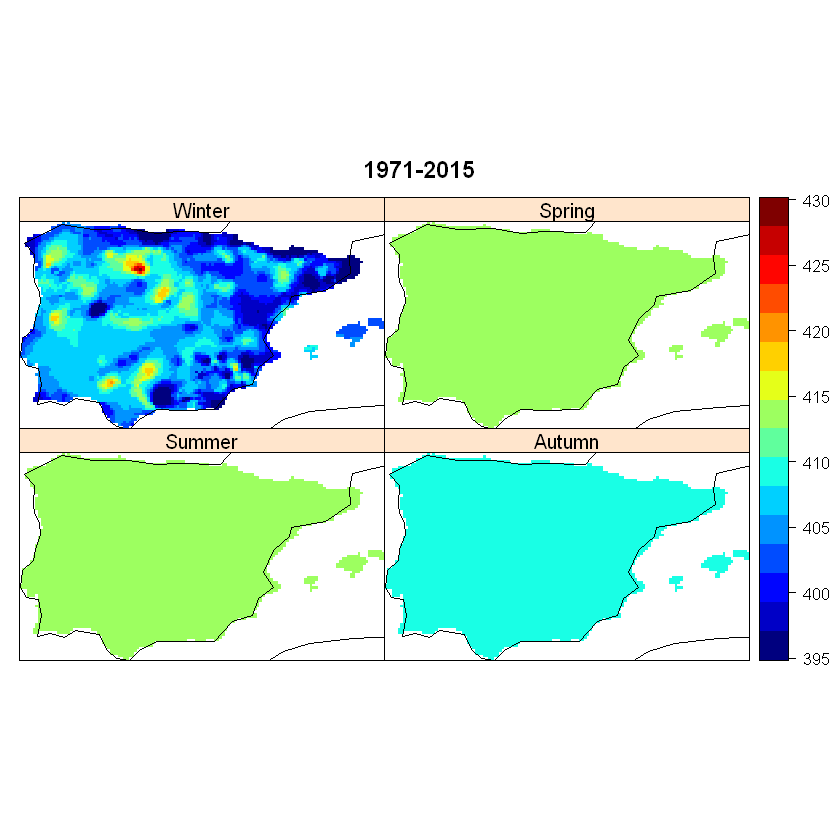

In [29]:
spatialPlot(tmax, backdrop.theme = "coastline", color.theme = "jet.colors", names.attr = c("Winter", "Spring", "Summer", "Autumn"), as.table = TRUE, main = "1971-2015")

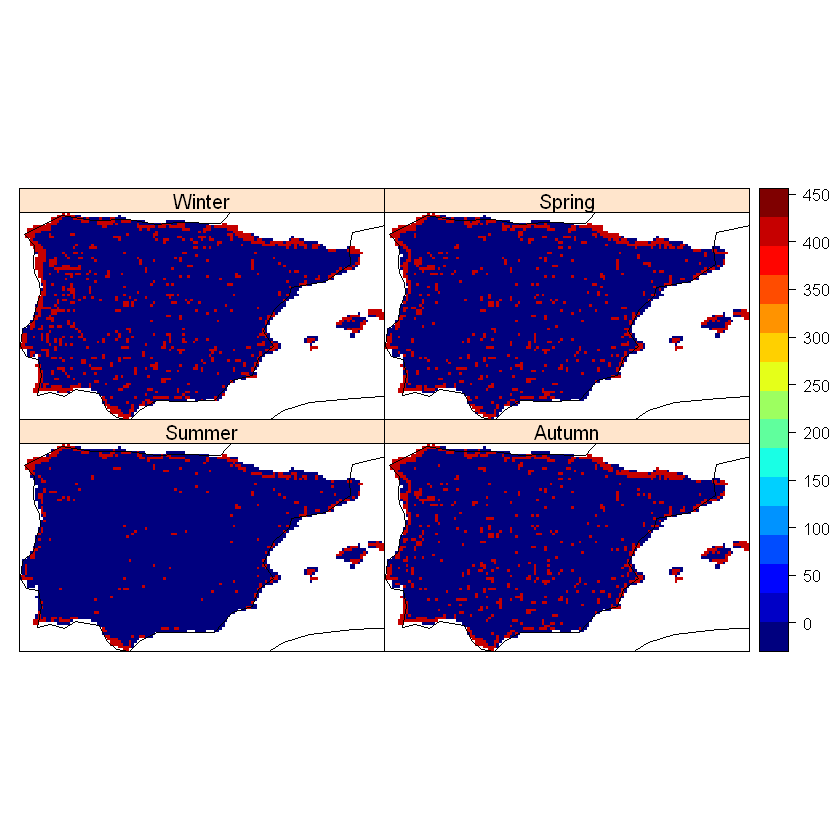

In [25]:
spatialPlot(pr, backdrop.theme = "coastline", color.theme = "jet.colors", names.attr = c("Winter", "Spring", "Summer", "Autumn"), as.table = TRUE)

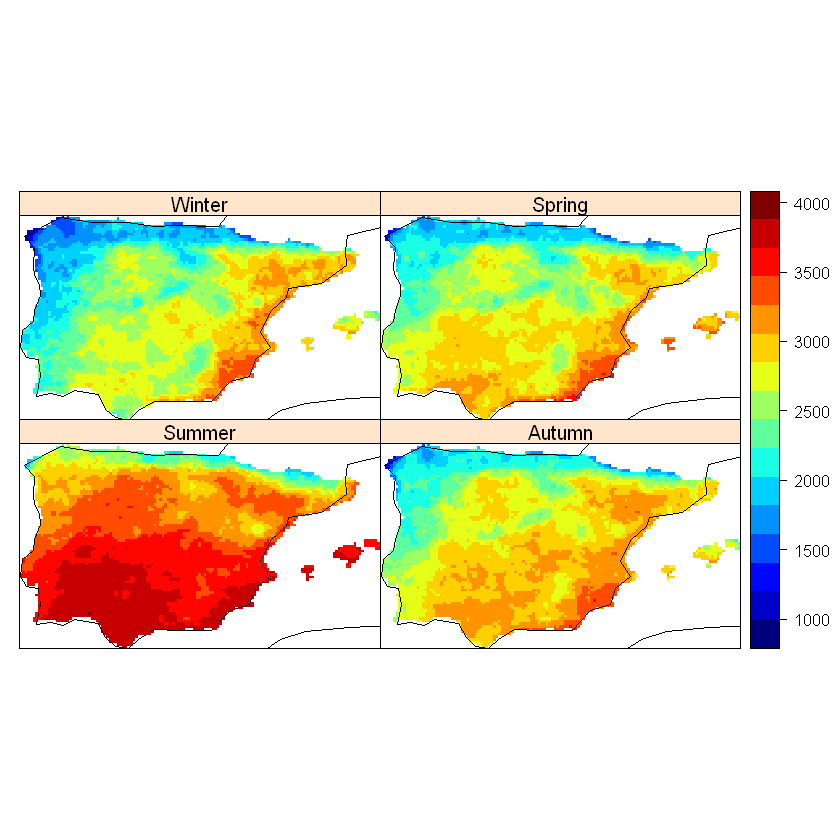

In [26]:
spatialPlot(pr_h, backdrop.theme = "coastline", color.theme = "jet.colors", names.attr = c("Winter", "Spring", "Summer", "Autumn"), as.table = TRUE)